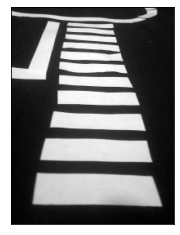

In [2]:
from matplotlib import image
from matplotlib import pyplot
from PIL import Image
from numpy import asarray
import numpy as np
import random
import math
import cv2

#gambar di-print di python
im = Image.open('SKRIPSI Zebra Cross.png')
#im = Image.open('SKRIPSI Pinus.png')
#im = Image.open('SKRIPSI Gedung C.png')

img1 = im.convert("L") #convert ke hitam-putih
width, height=img1.size

pyplot.xticks([]), pyplot.yticks([])
pyplot.imshow(img1, cmap = 'gray')

In [6]:
#PROGRAM METODE BEDA HINGGA EKSPLISIT DIMENSI DUA PADA CITRA
from numpy import linspace, array, zeros, insert, delete
from pandas import DataFrame, pivot_table
from math import ceil

D=1 #koefisien difusivitas
xm=width*2 #panjang sumbu x
yn=height*2 #panjang sumbu y
deltat=0.2 #selisih waktu
tn=100 #batas waktu pada t_n
m=width #banyak pemotongan pada sumbu x
n=height #banyak pemotongan pada sumbu y
deltax=xm/m #selisih antar posisi di sumbu x
deltay=yn/n #selisih antar posisi di sumbu y
lamda=(D*deltat)/(deltax)**2 #lamda

#melakukan uji kestabilan metode
if lamda<=0.25:
    print('Metode stabil, sebab lambda =', lamda, '\leq 0.25')
else:
    print('Metode tidak stabil, cek kembali masukan')

#mendefinisikan array kosong V yg berisi para matriks berukuran mxn
#para matriks di dalam V disebut matriks U
V=array([zeros((n,m))])
W=array([zeros((n-2,m-2))]) #array display #tidak menampilkan piksel tepi

#mengisi syarat awal ke matriks U saat t=0
U=array(img1) #matriks pertama U, diisi data gambar
#print(U)

#matriks pertama U dimasukkan ke array V
V=insert(V,0,U,axis = 0)

#matriks display awal X
#tepi dihapus satu persatu
X=delete(U, n-1, 0)
X=delete(X, 0, 0)
X=delete(X, m-1, 1)
X=delete(X, 0, 1)
W=insert(W,0,X,axis = 0)
#print(W)

#------------------------------ENTRI PERTAMA SELESAI-----------------------------

Q=np.array(zeros((n,m))) #matriks Q sebagai wadah kosong
#mengisi syarat batas ke setiap batas (tepi) matriks U saat t=1
for c in range (m):
    Q[0][c]=U[0][c]
    Q[n-1][c]=U[n-1][c]
for d in range (n):
    Q[d][0]=U[d][0]
    Q[d][m-1]=U[d][m-1]
#print(Q)

#mengisi entri matriks U yang belum terisi
#berdasarkan rumus metode eksplisit
for j in range (1,n-1):
    for i in range (1,m-1):
        Q[j][i]=ceil((1-4*lamda)*U[j][i]+lamda*(U[j-1][i]+U[j+1][i]+U[j][i-1]+U[j][i+1]))
#print(Q)
V=insert(V,1,Q,axis = 0)

#matriks display kedua S
#tepi dihapus satu persatu lagi
S=delete(Q, n-1, 0)
S=delete(S, 0, 0)
S=delete(S, m-1, 1)
S=delete(S, 0, 1)
W=insert(W,1,S,axis = 0)
#print(W)

#------------------------------ENTRI KEDUA SELESAI-----------------------------

#R=Q
R=array(zeros((n,m)))
for j in range (n):
    for i in range (m):
        R[j][i]=Q[j][i]
#print(R)

#mengisi syarat batas ke setiap batas matriks U saat t=2 sampai t=tn
for k in range (2,tn+1):  
    for c in range (m):
        R[0][c]=Q[0][c]
        R[n-1][c]=Q[n-1][c]
    for d in range (n):
        R[d][0]= Q[d][0]
        R[d][m-1]= Q[d][m-1]
#print(Q)

#mengisi entri matriks U yang belum terisi
#berdasarkan rumus metode eksplisit
    for j in range (1,n-1):
        for i in range (1,m-1):
            R[j][i]=ceil((1-4*lamda)*Q[j][i]+lamda*(Q[j-1][i]+Q[j+1][i]+Q[j][i-1]+Q[j][i+1]))
            #print(R)
            #print(Q)
    V=insert(V,k,R,axis = 0)
    #menghapus tepi
    T=delete(R, n-1, 0)
    T=delete(T, 0, 0)
    T=delete(T, m-1, 1)
    T=delete(T, 0, 1)
    W=insert(W,k,T,axis = 0)
    for j in range (n):
        for i in range (m):
            Q[j][i]=R[j][i]

#------------------------------ENTRI KETIGA SAMPAI TERAKHIR SELESAI-----------------------------            
            
#menghapus entri terakhir
V=delete(V, tn+1, 0) #V kumpulan matriks asli
#print(V)
W=delete(W, tn+1, 0) #W kumpulan matriks display
#print(W)

Metode stabil, sebab lambda = 0.05 \leq 0.25


E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: overflow encountered in ubyte_scalars


In [7]:
#PROGRAM UNTUK MENDETEKSI GARIS TEPI PADA CITRA
from numpy import sqrt
#Iterasi ke-sekian yang ingin dideteksi tepinya
iterasi1=1
iterasi2=5
iterasi3=20
iterasi4=50
TEPI1=V[iterasi1]
TEPI2=V[iterasi2]
TEPI3=V[iterasi3]
TEPI4=V[iterasi4]
#SELISIH=V[iterasi]-V[iterasi-1] #BARU BENER
#print(TEPI)

#DEFINISI MATRIKS GRAD
GRAD1=np.array(zeros((n,m)))
GRAD2=np.array(zeros((n,m)))
GRAD3=np.array(zeros((n,m)))
GRAD4=np.array(zeros((n,m)))
#mengisi syarat batas ke setiap batas matriks GRAD saat t=iterasi
for c in range (m):
    GRAD1[0][c]=TEPI1[0][c]
    GRAD1[n-1][c]=TEPI1[n-1][c]
    GRAD2[0][c]=TEPI2[0][c]
    GRAD2[n-1][c]=TEPI2[n-1][c]
    GRAD3[0][c]=TEPI3[0][c]
    GRAD3[n-1][c]=TEPI3[n-1][c]
    GRAD4[0][c]=TEPI4[0][c]
    GRAD4[n-1][c]=TEPI4[n-1][c]
for d in range (n):
    GRAD1[d][0]=TEPI1[d][0]
    GRAD1[d][m-1]=TEPI1[d][m-1]
    GRAD2[d][0]=TEPI2[d][0]
    GRAD2[d][m-1]=TEPI2[d][m-1]
    GRAD3[d][0]=TEPI3[d][0]
    GRAD3[d][m-1]=TEPI3[d][m-1]
    GRAD4[d][0]=TEPI4[d][0]
    GRAD4[d][m-1]=TEPI4[d][m-1]

#mengisi entri matriks GRAD yang belum terisi
#berdasarkan RUMUS GRAD
for j in range (1,n-1):
    for i in range (1,m-1):
        GRAD1[j][i]=sqrt((((TEPI1[j+1][i]-TEPI1[j-1][i])/deltay)**2)+(((TEPI1[j][i+1]-TEPI1[j][i-1])/deltax)**2))
        GRAD2[j][i]=sqrt((((TEPI2[j+1][i]-TEPI2[j-1][i])/deltay)**2)+(((TEPI2[j][i+1]-TEPI2[j][i-1])/deltax)**2))
        GRAD3[j][i]=sqrt((((TEPI3[j+1][i]-TEPI3[j-1][i])/deltay)**2)+(((TEPI3[j][i+1]-TEPI3[j][i-1])/deltax)**2))
        GRAD4[j][i]=sqrt((((TEPI4[j+1][i]-TEPI4[j-1][i])/deltay)**2)+(((TEPI4[j][i+1]-TEPI4[j][i-1])/deltax)**2))

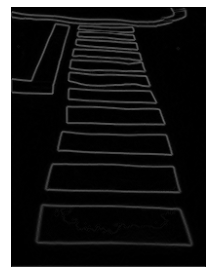

In [9]:
#PROGRAM UNTUK MENGELUARKAN HEATMAP HASIL
#DETEKSI GARIS TEPI PADA CITRA
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,9))

plt.subplot(141)
pyplot.xticks([]), pyplot.yticks([])
pyplot.imshow(GRAD1, cmap='gray')

#plt.subplot(142)
#pyplot.xticks([]), pyplot.yticks([])
#pyplot.imshow(GRAD2, cmap='gray')

#plt.subplot(143)
#pyplot.xticks([]), pyplot.yticks([])
#pyplot.imshow(GRAD3, cmap='gray')

#plt.subplot(144)
#pyplot.xticks([]), pyplot.yticks([])
#pyplot.imshow(GRAD4, cmap='gray')

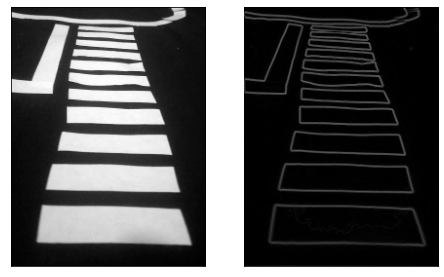

In [11]:
#PROGRAM UNTUK MENGELUARKAN HEATMAP HASIL
#DETEKSI GARIS TEPI PADA CITRA
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,9))

plt.subplot(141)
pyplot.xticks([]), pyplot.yticks([])
pyplot.imshow(V[0], cmap='gray')

plt.subplot(142)
pyplot.xticks([]), pyplot.yticks([])
pyplot.imshow(GRAD1, cmap='gray')

#plt.subplot(143)
#pyplot.xticks([]), pyplot.yticks([])
#pyplot.imshow(GRAD3, cmap='gray')

#plt.subplot(144)
#pyplot.xticks([]), pyplot.yticks([])
#pyplot.imshow(GRAD4, cmap='gray')